In [1]:
# https://github.com/minsuk-heo/kaggle-titanic/tree/master 
import pandas as pd
import numpy as np

### Part I. Data import and review

In [2]:
train = pd.read_csv(r'D:\edu_for_beginer\train.csv')
test = pd.read_csv(r'D:\edu_for_beginer\test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Columns Description  
###### Survived: 0 = No, 1 = Yes
###### pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
###### sibsp: # of siblings / spouses aboard the Titanic
###### parch: # of parents / children aboard the Titanic
###### ticket: Ticket number
###### cabin: Cabin number
###### embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#how many null value? 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#how many null value? 
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style='darkgrid')

In [12]:
#define the function 'bar_chart'
def bar_chart(feature): 
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['LIVE', 'DEATH']
    df.plot(kind='bar', stacked = True, figsize=(10,5))  #stacked = False --> side-by-side chart

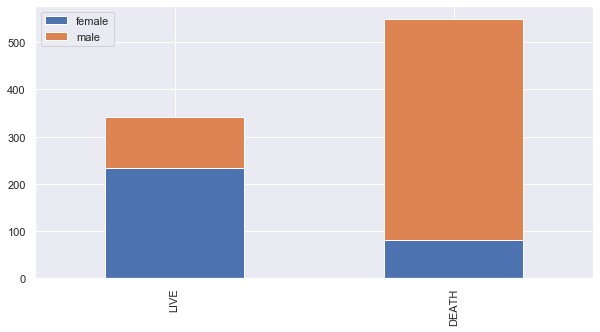

In [13]:
bar_chart('Sex')

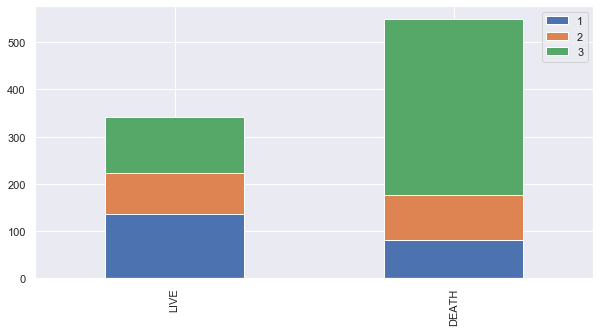

In [14]:
bar_chart('Pclass')

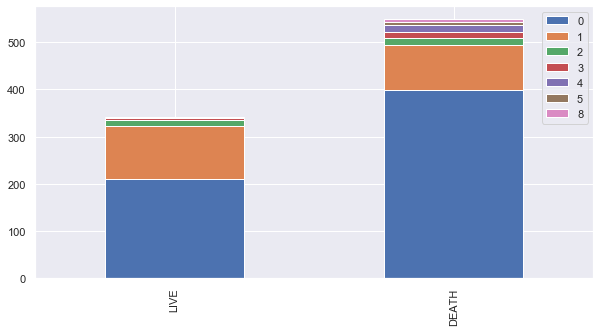

In [15]:
bar_chart('SibSp')

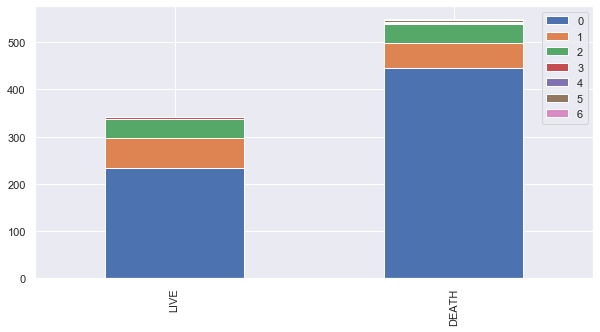

In [16]:
bar_chart('Parch')

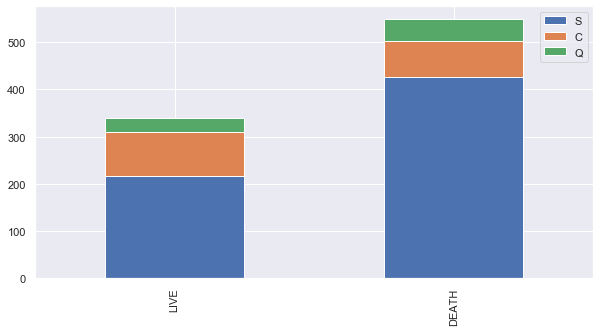

In [17]:
bar_chart('Embarked')

### Part II. Feature Engineering 

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [20]:
train_test_data = [train, test]  #combine train & test datasets

In [21]:
#find all the str which is ended with '.' --> getting title (Mr., Mrs., Miss., Ms., ...)
for dataset in train_test_data: 
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [22]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [23]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Ms            1
Sir           1
Countess      1
Jonkheer      1
Capt          1
Don           1
Mme           1
Name: Title, dtype: int64

In [24]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [25]:
#re-coding the title (Mr:0, Miss:1, Mrs:2, Others:3)
title_mapping = {'Mr': 0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Mlle':3,
                 'Major':3, 'Capt':3, 'Jonkheer':3, 'Don':3, 'Sir':3, 'Lady':3, 'Countess':3, 
                 'Mme':3, 'Ms':3, 'Dona':3, 'Dr':3}

for dataset in train_test_data: 
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [28]:
#delete the original name field 
#axis = 0 --> drop the row, axis = 1 --> drop the column 
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [29]:
#re-coding the sex (M:0, F:1)
sex_mapping = {'male':0, 'female':1} 
for dataset in train_test_data: 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [30]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


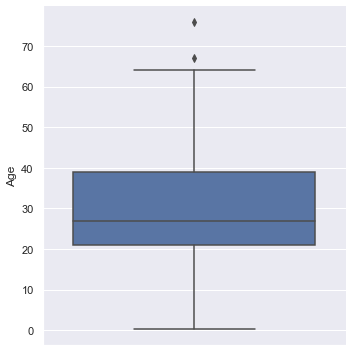

In [31]:
# Is there out lier in age? 
#sns.catplot(data = train, y = 'Age', kind = 'box') 
sns.catplot(data = test, y = 'Age', kind = 'box') 

In [32]:
# NaN of age : fill with median age in the title(Mr, Miss, Mrs, others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True) 
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True) 

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [34]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

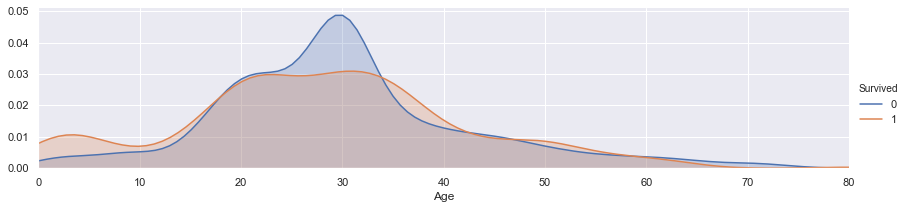

In [35]:
#display chart
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0, 20)

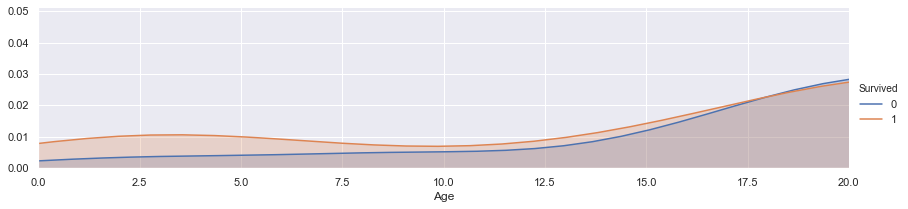

In [36]:
#display chart: xlim is 0 ~ 20 
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(0, 20)

(20, 40)

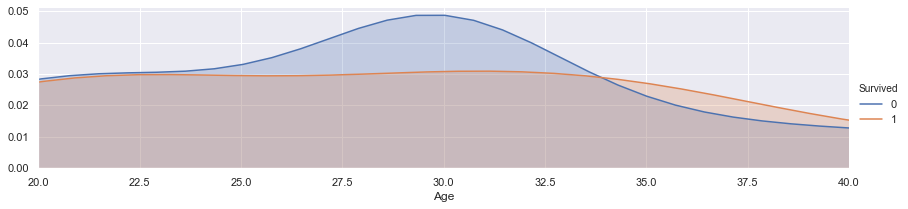

In [37]:
#display chart: xlim is 0 ~ 20 
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(20, 40)

(40, 80)

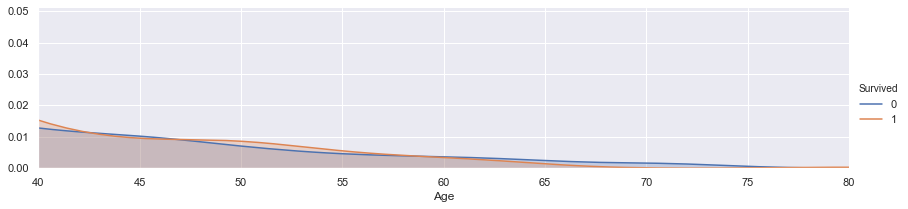

In [38]:
#display chart: xlim is 0 ~ 20 
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(40, 80)

##### binning the age and re-coding 
##### child : 0 
##### young : 1 
##### adult : 2 
##### mid-age : 3 
##### senior : 4 

In [94]:
#binning the age
for dataset in train_test_data: 
    dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0, 
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <=20), 'Age'] =1,  
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <=35), 'Age'] =2,  
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <=60), 'Age'] =3,  
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4   

In [95]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,2.0,0.0,2.0,2,0,0.0
6,0,1,0,3.0,2.0,1.6,0,0,0.0
7,0,3,0,0.0,1.0,2.0,0,3,1.6
8,1,3,1,2.0,0.0,2.0,0,2,0.8
9,1,2,1,0.0,2.0,1.8,1,2,0.4


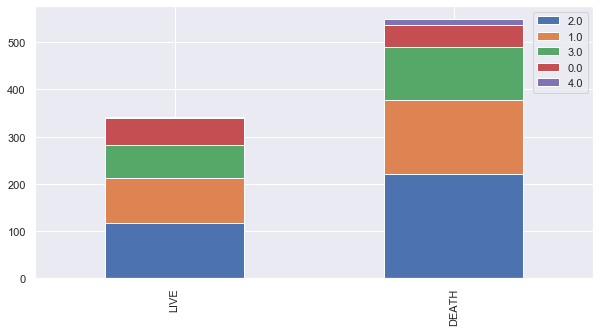

In [96]:
bar_chart('Age')

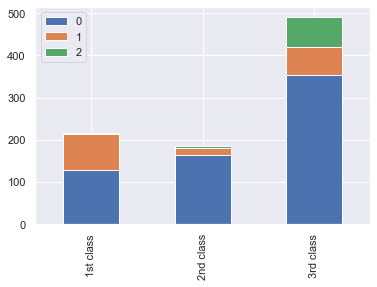

In [97]:
#Some embark is more rich, right?
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked = True)

In [43]:
#fill the NaN in Embark with 'S' (because Embarked has most population)
for dataset in train_test_data: 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [44]:
#re-coding the embark 
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data: 
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [45]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [46]:
#train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [47]:
# fill the NaN in fare with median of the class 
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [48]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

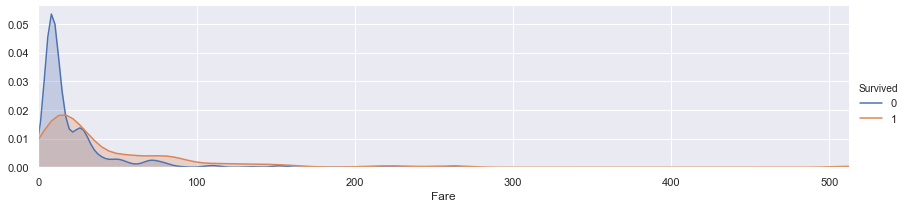

In [49]:
#display chart
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

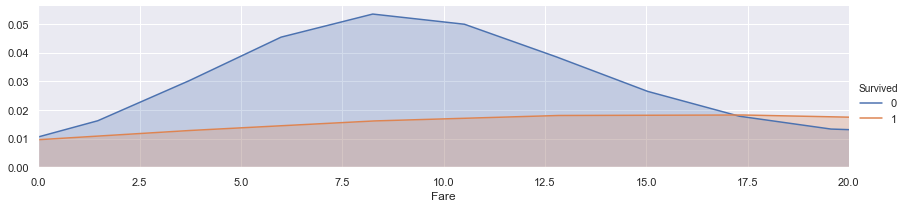

In [50]:
#display chart : fare is in 0~20 
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 20)

(20, 50)

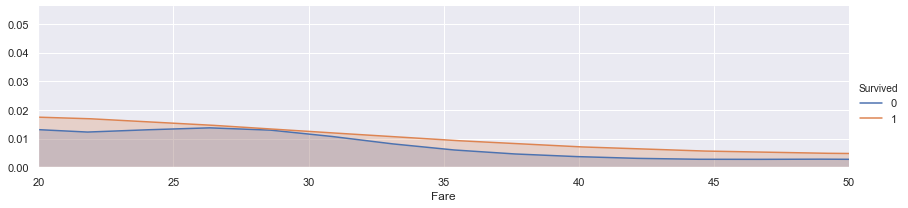

In [51]:
#display chart : fare is in 20~50 
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(20, 50)

In [98]:
# binning the fare 
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [53]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [54]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
D                  3
C22 C26            3
F33                3
F2                 3
B51 B53 B55        2
E8                 2
C68                2
B77                2
F4                 2
E25                2
F G73              2
E121               2
D36                2
C78                2
C52                2
E33                2
C125               2
B28                2
C65                2
D26                2
C92                2
B57 B59 B63 B66    2
B22                2
C93                2
C83                2
D33                2
                  ..
A24                1
D45                1
D19                1
A19                1
C101               1
E68                1
D6                 1
C70                1
E50                1
D46                1
B86                1
C86                1
C54                1
E10                1
B102               1
D7                 1
D56          

In [55]:
#extract the first alphabet in Cabin
for dataset in train_test_data : 
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [56]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

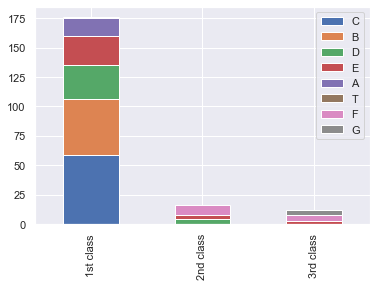

In [57]:
# Is there relativeness between Pclass & Cabin? 
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = 'True')

In [58]:
# re-coding cabin (by Ucladian distance)
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2.0, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data : 
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [59]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [60]:
#fill the NaN with median of Pclass
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [61]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2


In [62]:
# Family size = SibSp + Parch + 1 (including myself) 
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

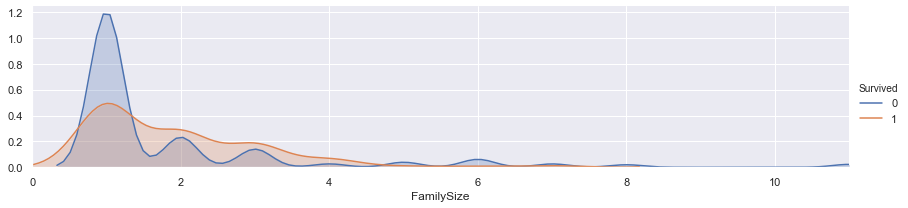

In [63]:
#display chart
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.show()

(0, 2)

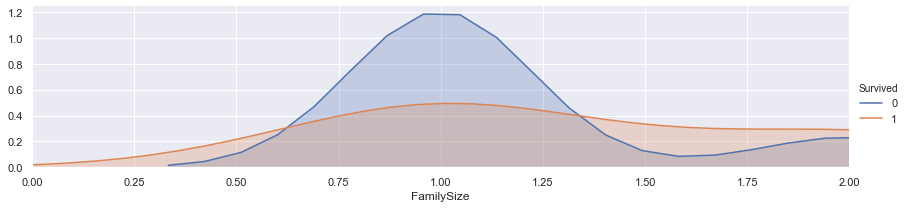

In [64]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0, 2)

(2, 6)

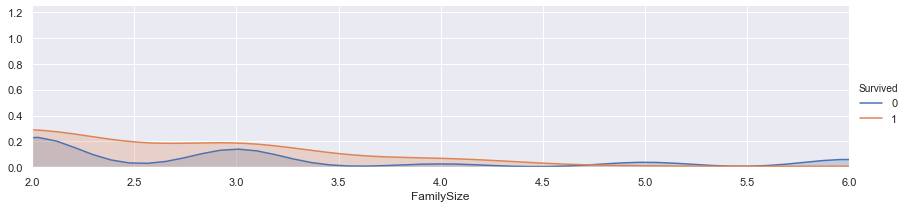

In [65]:
facet = sns.FacetGrid(train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.xlim(2, 6)

In [66]:
#re-coding familysize with Ucladian distance 
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 
                  10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [68]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


In [69]:
#train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [70]:
# drop the don't nessesary columns 
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [71]:
train = train.drop(['PassengerId'], axis=1)

In [72]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [73]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


In [74]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [75]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


### Part III. Modeling 

##### About Classify Algorism 
###### 1. kNN (k-Nearest Neighber) : 근접한 k개의 이웃 변수들의 결과에 따라 판단 
###### 2. Decision tree : 의사결정 나무 
###### 3. Random Forest : 다수의 의사결정 나무들이 도출한 결과값들에 대한 다수결 
###### 4. Nive Bayes : 여려 변수들(Sex, Age, Pclass, ...) 각각이 y값(Live or Dead)에 도달할 확률의 총계 
###### 5. SVM(Support Vector Machin) : 기준 vector에 대해 해당 case의 위치로써 해당 case의 결과(Live or Dead) 판단 

In [99]:
# import the Classifier pkgs from Scikit-learn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


In [100]:
# cross validation with K-fold 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [103]:
# 1. kNN : train_data를 10개로 나누어 validation한 결과, 10개의 accuracy score를 얻게 됨 
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score

array([0.82222222, 0.76404494, 0.80898876, 0.83146067, 0.87640449,
       0.82022472, 0.85393258, 0.79775281, 0.84269663, 0.84269663])

In [102]:
# 10개의 accuracy score를 평균하여, 100점 만점 기준으로 표현 
round(np.mean(score)*100, 2)

82.6

In [81]:
# 2. Decision tree 
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score

array([0.76666667, 0.80898876, 0.76404494, 0.7752809 , 0.88764045,
       0.75280899, 0.82022472, 0.82022472, 0.74157303, 0.78651685])

In [104]:
round(np.mean(score)*100, 2)

82.6

In [105]:
# 3. Random Forest 
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score

array([0.81111111, 0.83146067, 0.80898876, 0.78651685, 0.87640449,
       0.7752809 , 0.78651685, 0.83146067, 0.74157303, 0.83146067])

In [106]:
round(np.mean(score)*100, 2)

80.81

In [107]:
# 4. Naive Bayes 
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score

array([0.85555556, 0.73033708, 0.75280899, 0.75280899, 0.70786517,
       0.80898876, 0.76404494, 0.80898876, 0.86516854, 0.83146067])

In [108]:
round(np.mean(score)*100, 2)

78.78

In [109]:
# 5. SVM 
clf = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)
score

array([0.83333333, 0.80898876, 0.83146067, 0.82022472, 0.84269663,
       0.82022472, 0.84269663, 0.85393258, 0.83146067, 0.86516854])

In [110]:
round(np.mean(score)*100, 2)

83.5

##### Summry of the Comparing the results 
##### 1. kNN = 82.6 
##### 2. Decision tree = 79.91 
##### 3. Random Forest = 80.58 
##### 4. Naive Bayes = 78.78 
##### 5. SVM = 83.5 

In [89]:
#test.head()
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [90]:
# Model test 
clf = SVC(gamma='auto')
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [91]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'], 
    'Survived': prediction 
})

submission.to_csv('submission.csv', index = False)

In [111]:
submission = pd.read_csv('submission.csv')
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [112]:
submission.to_csv('D:\edu_for_beginer\submission.csv', index = False)